In [ ]:
from Environment.panda_7DoF import PandaEnv

env = PandaEnv()


pybullet build time: May 20 2022 19:44:17


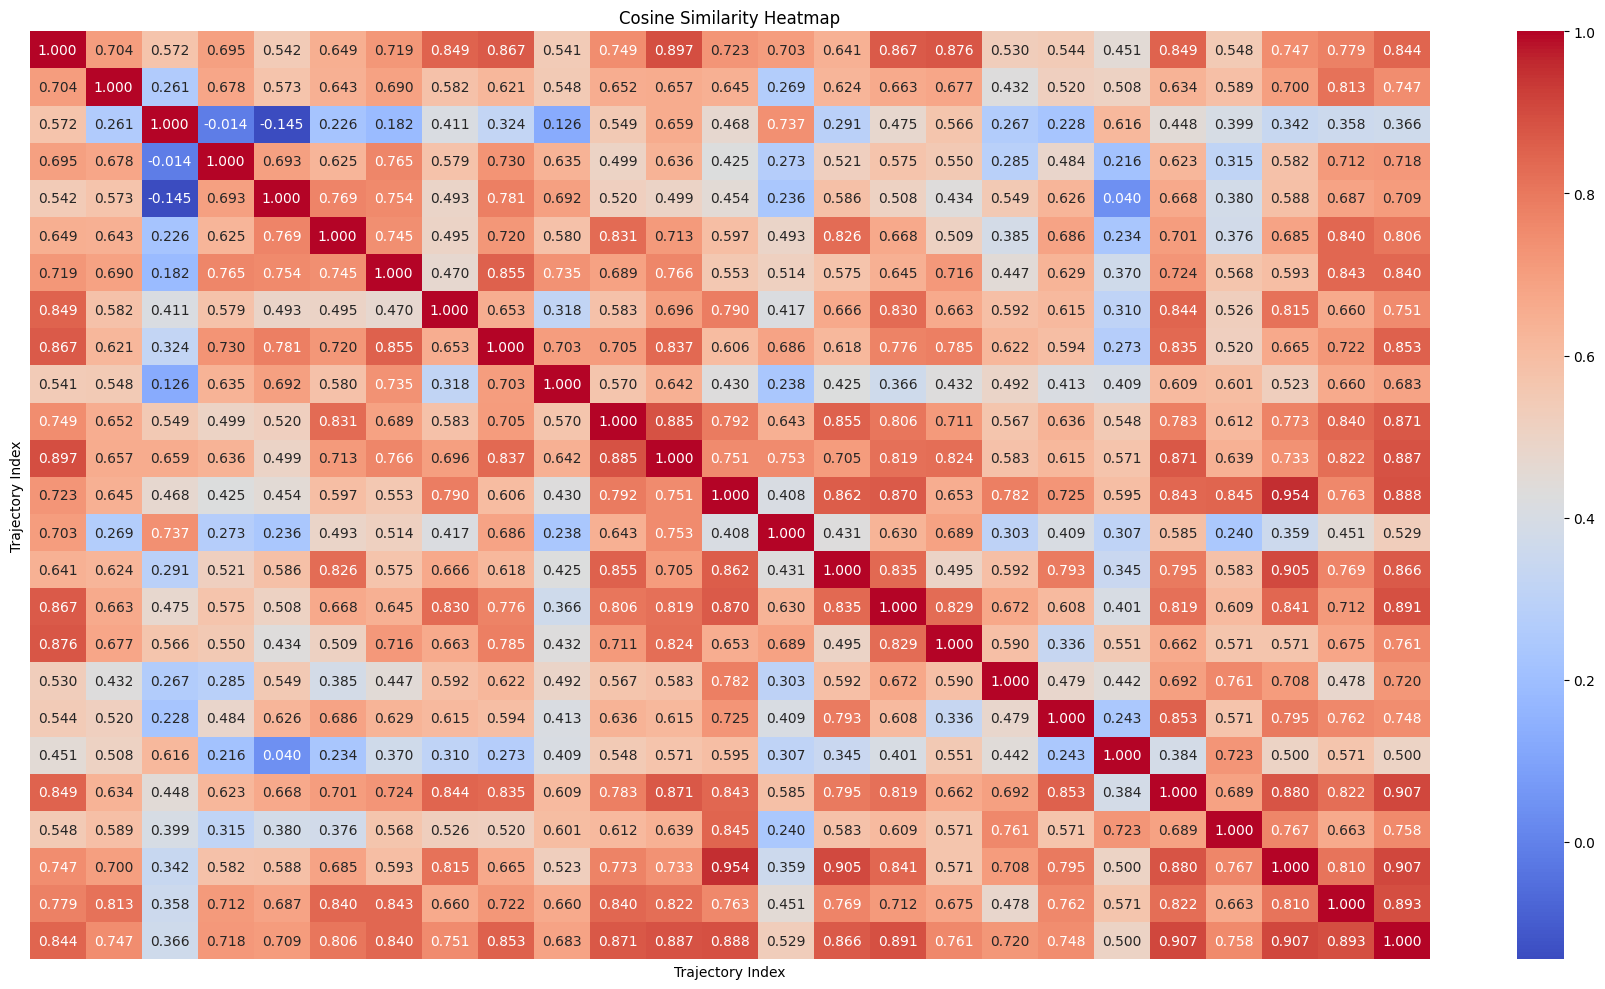

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import pybullet as p
import pybullet_data
import pybullet_utils.bullet_client as bc

trajectories = np.load('unguided_multimodality_trajs_without_goal_conditioning_128.npy')

# Reshape trajectories to (25, 350) for cosine similarity calculation
reshaped_trajectories = [trajectory.reshape(-1) for trajectory in trajectories]
stacked_trajectories = np.vstack(reshaped_trajectories)

# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(stacked_trajectories, stacked_trajectories)

# Create a heatmap using seaborn
plt.figure(figsize=(18, 10))
sns.heatmap(cosine_sim_matrix, cmap='coolwarm', annot=True, fmt=".3f", xticklabels=False, yticklabels=False)
plt.title('Cosine Similarity Heatmap')
plt.xlabel('Trajectory Index')
plt.ylabel('Trajectory Index')
plt.tight_layout()
plt.show()

In [2]:
%matplotlib qt # For interactive matplotlib windows (acts opposite to "inline" which creates inline plots like the one above)

import numpy as np
import matplotlib.pyplot as plt
import pybullet as p
import pybullet_data
import pybullet_utils.bullet_client as bc
from matplotlib import interactive

interactive(True)


# Create 25 example trajectories, each of shape (50, 7)
num_trajectories = 25
trajectory_length = 50
num_dimensions = 7

trajectories = np.load('unguided_multimodality_trajs_without_goal_conditioning_64.npy')

gui =True
timestep = 1/480

client_id = bc.BulletClient(p.GUI if gui else p.DIRECT)
client_id.setAdditionalSearchPath(pybullet_data.getDataPath())
client_id.setTimeStep(timestep)
client_id.configureDebugVisualizer(p.COV_ENABLE_SHADOWS, 0)
p.setAdditionalSearchPath(pybullet_data.getDataPath())

target = client_id.getDebugVisualizerCamera()[11]
client_id.resetDebugVisualizerCamera(
    cameraDistance=1.5,
    cameraYaw=90,
    cameraPitch=-25,
    cameraTargetPosition=target,
)


p.resetSimulation()
client_id.setGravity(0, 0, -9.8)

plane = client_id.loadURDF("plane.urdf", basePosition=(0, 0, -0.0005), useFixedBase=True)
workspace = client_id.loadURDF(
    "./Assets/workspace/workspace.urdf", basePosition=(0.5, 0, 0), useFixedBase=True
)
client_id.changeDynamics(
    plane,
    -1,
    lateralFriction=1.1,
    restitution=0.5,
    linearDamping=0.5,
    angularDamping=0.5,
)
client_id.changeDynamics(
    workspace,
    -1,
    lateralFriction=1.1,
    restitution=0.5,
    linearDamping=0.5,
    angularDamping=0.5,
)

panda = client_id.loadURDF("franka_panda/panda.urdf", basePosition=(0, 0, 0), useFixedBase=True)
panda_joints = []
for i in range(client_id.getNumJoints(panda)):
    info = client_id.getJointInfo(panda, i)
    joint_id = info[0]
    joint_name = info[1].decode("utf-8")
    joint_type = info[2]
    # if joint_name == "ee_fixed_joint":
        # panda_ee_id = joint_id
    if joint_type == client_id.JOINT_REVOLUTE:
        panda_joints.append(joint_id)
# client_id.enableJointForceTorqueSensor(panda, panda_ee_id, 1)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Iterate through trajectories and visualize end effector positions
for i, trajectory in enumerate(trajectories):
    x_vals = []
    y_vals = []
    z_vals = []
    for step in range(trajectory_length):
        joint_positions = trajectory[step]
        
        # Set joint positions for visualization
        for j, joint_angle in enumerate(joint_positions):
            client_id.resetJointState(panda, j, joint_angle)
        
        # Get end effector position
        end_effector_pos =  client_id.getLinkState(panda, 6, computeForwardKinematics=1)[0]
        
        x_vals.append(end_effector_pos[0])
        y_vals.append(end_effector_pos[1])
        z_vals.append(end_effector_pos[2])

    # Plot end effector positions for each trajectory
    ax.plot(x_vals, y_vals, z_vals, label=f"Trajectory {i+1}")

# Set labels and title for the 3D plot
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("End Effector Positions")

# Show the 3D plot and PyBullet visualization
ax.legend()
plt.show()

# Disconnect from PyBullet
p.disconnect()

argv[0]=
startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=3
argv[0] = --unused
argv[1] = 
argv[2] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=NVIDIA Corporation
GL_RENDERER=NVIDIA GeForce GTX 1050 Ti/PCIe/SSE2
GL_VERSION=3.3.0 NVIDIA 525.89.02
GL_SHADING_LANGUAGE_VERSION=3.30 NVIDIA via Cg compiler
pthread_getconcurrency()=0
Version = 3.3.0 NVIDIA 525.89.02
Vendor = NVIDIA Corporation
Renderer = NVIDIA GeForce GTX 1050 Ti/PCIe/SSE2
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
numActiveThreads = 0
stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main 